<a href="https://colab.research.google.com/github/jj2883/Applied_DL_COMS4995/blob/master/App_DL_HW2_Part1_P2_jj2883.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os

# The code in this notebook should work identically in TF v1 and v2
import tensorflow as tf
import zipfile

from tensorflow.keras.applications import VGG16, ResNet50, MobileNet
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:

!wget https://storage.googleapis.com/applied-dl/mini_flowers.zip \
    -O /tmp/mini_flowers.zip

--2019-03-04 22:29:18--  https://storage.googleapis.com/applied-dl/mini_flowers.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 2607:f8b0:4001:c19::80
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40110537 (38M) [application/zip]
Saving to: ‘/tmp/mini_flowers.zip’

/tmp/mini_flowers.z 100%[===================>]  38.25M  58.4MB/s    in 0.7s    

2019-03-04 22:29:19 (58.4 MB/s) - ‘/tmp/mini_flowers.zip’ saved [40110537/40110537]



In [0]:
local_zip = '/tmp/mini_flowers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/mini_flowers')
zip_ref.close()

In [0]:
base_dir = '/tmp/mini_flowers'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_daisy_dir = os.path.join(train_dir, 'daisy')
train_dandelion_dir = os.path.join(train_dir, 'dandelion')
train_roses_dir = os.path.join(train_dir, 'roses')
train_sunflowers_dir = os.path.join(train_dir, 'sunflowers')
train_tulips_dir = os.path.join(train_dir, 'tulips')

validation_daisy_dir = os.path.join(validation_dir, 'daisy')
validation_dandelion_dir = os.path.join(validation_dir, 'dandelion')
validation_roses_dir = os.path.join(validation_dir, 'roses')
validation_sunflowers_dir = os.path.join(validation_dir, 'sunflowers')
validation_tulips_dir = os.path.join(validation_dir, 'tulips')

In [0]:
num_daisy_tr = len(os.listdir(train_daisy_dir))
num_dandelion_tr = len(os.listdir(train_dandelion_dir))
num_roses_tr = len(os.listdir(train_roses_dir))
num_sunflowers_tr = len(os.listdir(train_sunflowers_dir))
num_tulips_tr = len(os.listdir(train_tulips_dir))

num_daisy_val = len(os.listdir(validation_daisy_dir))
num_dandelion_val = len(os.listdir(validation_dandelion_dir))
num_roses_val = len(os.listdir(validation_roses_dir))
num_sunflowers_val = len(os.listdir(validation_sunflowers_dir))
num_tulips_val = len(os.listdir(validation_tulips_dir))

total_train = num_daisy_tr + num_dandelion_tr + num_roses_tr + num_sunflowers_tr+ num_tulips_tr
total_val = num_daisy_val + num_dandelion_val + num_roses_val + num_sunflowers_val + num_tulips_val

In [6]:
print('Training daisy images:', num_daisy_tr)
print('Training dandelion images:', num_dandelion_tr)
print('Training roses images:', num_roses_tr)
print('Training sunflowers images:', num_sunflowers_tr)
print('Training tulips images:', num_tulips_tr)

print('Validation daisy images:', num_daisy_val)
print('TValidation dandelion images:', num_dandelion_val)
print('Validation roses images:', num_roses_val)
print('Validation sunflowers images:', num_sunflowers_val)
print('Validation tulips images:', num_tulips_val)

print("--")

print("Total training images:", total_train)
print("Total validation images:", total_val)

Training daisy images: 200
Training dandelion images: 200
Training roses images: 200
Training sunflowers images: 200
Training tulips images: 200
Validation daisy images: 100
TValidation dandelion images: 100
Validation roses images: 100
Validation sunflowers images: 100
Validation tulips images: 100
--
Total training images: 1000
Total validation images: 500


# Part 1 P2 Transfer Learning using ResNet50 and MobileNet

In [0]:
from tensorflow.keras.applications import ResNet50, MobileNet


In [8]:
conv_resnet_base = ResNet50(weights='imagenet',include_top=False, input_shape=(128, 128, 3))
conv_mobilenet_base = MobileNet(weights='imagenet',include_top=False, input_shape=(128, 128, 3))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


17227776/17225924 [==============================] - 0s 0us/step


In [9]:
conv_resnet_base.summary()
conv_mobilenet_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 64, 64, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
model_resnet = Sequential()
model_resnet.add(conv_resnet_base)
model_resnet.add(Flatten())
#model_resnet.add(Dense(2048, activation='relu'))
#model_resnet.add(Dense(1024, activation='relu'))
model_resnet.add(Dense(512, activation='relu'))
#model_resnet.add(Dense(128, activation='relu'))
model_resnet.add(Dense(5, activation='softmax'))

model_mobilenet = Sequential()
model_mobilenet.add(conv_mobilenet_base)
model_mobilenet.add(Flatten())
#model_mobilenet.add(Dense(2048, activation='relu'))
#model_mobilenet.add(Dense(1024, activation='relu'))
model_mobilenet.add(Dense(512, activation='relu'))
#model_mobilenet.add(Dense(128, activation='relu'))
model_mobilenet.add(Dense(5, activation='softmax'))

In [18]:
model_resnet.summary()
model_mobilenet.summary()

TARGET_SHAPE = 128
BATCH_SIZE = 32
EPOCHS = 80

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               16777728  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 40,368,005
Trainable params: 16,780,293
Non-trainable params: 23,587,712
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228864   
_______________________________________________________

In [0]:
conv_resnet_base.trainable = False
conv_mobilenet_base.trainable = False


In [13]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode='categorical')

# Validation data should not be augmented!
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=validation_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')

Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


## Transfer Learning on ResNet50 and its plots

In [14]:
model_resnet.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

#Train ResNet50
resnet_history = model_resnet.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
16/16 [==============================] - 3s 211ms/step - loss: 6.2331 - acc: 0.1060
 - 13s - loss: 7.3510 - acc: 0.4670 - val_loss: 6.2331 - val_acc: 0.1060
Epoch 2/50
16/16 [==============================] - 2s 149ms/step - loss: 12.3736 - acc: 0.2000
 - 8s - loss: 6.6154 - acc: 0.5640 - val_loss: 12.3736 - val_acc: 0.2000
Epoch 3/50
16/16 [==============================] - 2s 148ms/step - loss: 12.6880 - acc: 0.1980
 - 9s - loss: 6.0672 - acc: 0.6000 - val_loss: 12.6880 - val_acc: 0.1980
Epoch 4/50
16/16 [==============================] - 2s 147ms/step - loss: 12.7914 - acc: 0.2000
 - 9s - loss: 6.2546 - acc: 0.5960 - val_loss: 12.7914 - val_acc: 0.2000
Epoch 5/50
16/16 [==============================] - 2s 148ms/step - loss: 12.3911 - acc: 0.2060
 - 9s - loss: 6.2658 - acc: 0.5960 - val_loss: 12.3911 - val_acc: 0.2060
Epoch 6/50
16/16 [==============================] - 2s 144ms/step - loss: 11.7235 - acc: 0.2060
 - 9s - loss

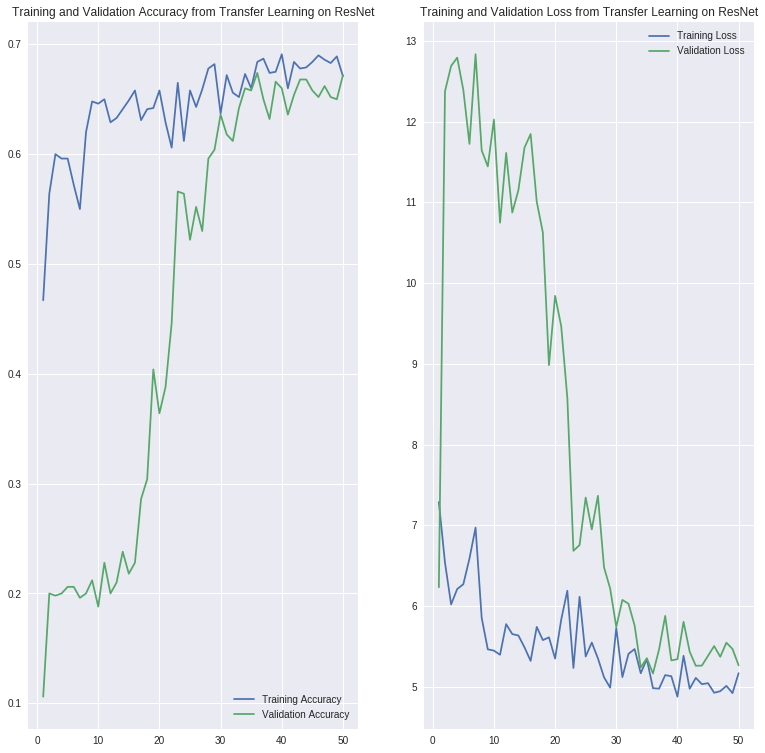

In [15]:
acc = resnet_history.history['acc']
val_acc = resnet_history.history['val_acc']

loss = resnet_history.history['loss']                                              
val_loss = resnet_history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(13,13))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy from Transfer Learning on ResNet')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss from Transfer Learning on ResNet')
plt.show()

## Transfer Learning on MobileNet and its plots

In [16]:
model_mobilenet.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Now is a good time for a cup of coffee
mobilenet_history = model_mobilenet.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)

Epoch 1/50
16/16 [==============================] - 2s 152ms/step - loss: 7.8262 - acc: 0.4960
 - 8s - loss: 8.1357 - acc: 0.4440 - val_loss: 7.8262 - val_acc: 0.4960
Epoch 2/50
16/16 [==============================] - 2s 126ms/step - loss: 7.1845 - acc: 0.5420
 - 7s - loss: 7.5966 - acc: 0.5160 - val_loss: 7.1845 - val_acc: 0.5420
Epoch 3/50
16/16 [==============================] - 2s 128ms/step - loss: 7.5334 - acc: 0.5220
 - 7s - loss: 7.6346 - acc: 0.5100 - val_loss: 7.5334 - val_acc: 0.5220
Epoch 4/50
16/16 [==============================] - 2s 128ms/step - loss: 7.2101 - acc: 0.5480
 - 7s - loss: 7.6566 - acc: 0.5110 - val_loss: 7.2101 - val_acc: 0.5480
Epoch 5/50
16/16 [==============================] - 2s 128ms/step - loss: 7.7036 - acc: 0.5120
 - 7s - loss: 7.2676 - acc: 0.5420 - val_loss: 7.7036 - val_acc: 0.5120
Epoch 6/50
16/16 [==============================] - 2s 127ms/step - loss: 7.9026 - acc: 0.5060
 - 7s - loss: 7.4884 - acc: 0.5280 - val_loss: 7.9026 - val_acc: 0.506

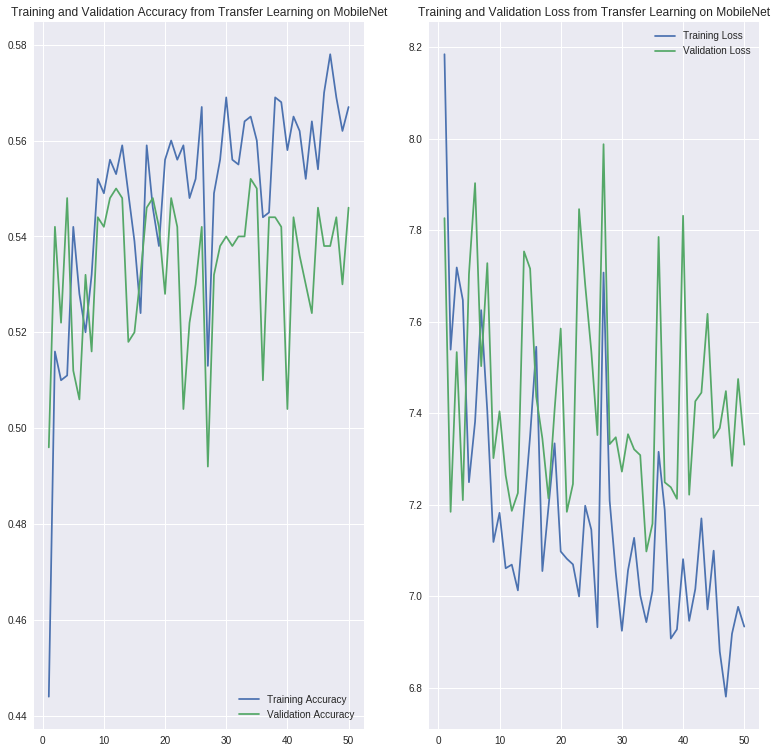

In [17]:
acc = mobilenet_history.history['acc']
val_acc = mobilenet_history.history['val_acc']

loss = mobilenet_history.history['loss']                                              
val_loss = mobilenet_history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(13,13))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy from Transfer Learning on MobileNet')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss from Transfer Learning on MobileNet')
plt.show()

# Observation
For ResNet50 model, the highest validation accuracy was around 65% and the lowest validation loss was 5.3. For MobileNet model, the highest validation accuracy was around 54% and the lowest validation loss was 7.2. 

In the case of ResNet, the accuracy increasesed smoothly, but in the case of MobileNet, the accuracy increased in a noisy manner. There are a lot of 'zig-zag' elements in the MobileNet Accuracy and Loss Plot compared to the respective ResNet Plots. This is due to the architecture of MobileNet. At the output of the pretrained model, ResNet had 32768 parameters after flattening, and MobileNet had 16384 parameters after flattening. ResNet50 had twice as much parameter after flattening.

Since MobileNet has less number of parameters connected to the Dense Layer (FC layer), the result is more sensitive to small changes in the weights of Dense Layer. Therefore, MobileNet had more 'zig-zag' characteristics in its accuracy and validation plots.